# Imitate in Unreal Engine

In [3]:
!pwd

/home/CAMPUS/eoca2018/raycasting-simulation/Notebooks


## Import Packages

In [1]:
from fastai.vision.all import *

sys.path.append("../Utilities")
from UnrealUtils import UE4EnvWrapper

from time import sleep

sys.path.append("../Automator")
from AutoGen import Navigator

### Load Model

In [2]:
model_path = Path("../Models/learner_2021-06-01 16:40:23.194027.pkl")
model_inf = load_learner(model_path)

## Get Maze Start Coordinates

In [4]:
maze = "../Mazes/maze01.txt"

In [5]:
navigator = Navigator(maze)

In [6]:
start_x, start_y, _  = navigator.directions[0].split()

In [7]:
start_x, start_y = int(start_x) + 0.5, int(start_y) + 0.5

In [8]:
start_x, start_y

(3.5, 3.5)

In [ ]:
def get_start_coords

## Initialize Unreal Engine Environment Wrapper

INFO:__init__:211:Got connection confirm: b'connected to Arcs'


Is Listening
Client Connected
9000
Configuration
Config file: C:/Users/Oliver Chang/Desktop/WindowsNoEditor/Arcs/Binaries/Win64/unrealcv.ini
Port: 9000
Width: 640
Height: 480
FOV: 90.000000
EnableInput: true
EnableRightEye: false



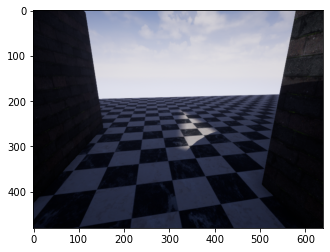

In [10]:
env = UE4EnvWrapper(3.5, 3.5)

if env.isconnected():
    fig, ax = plt.subplots()
    ax.imshow(env.request_image())

In [14]:
env.reset()
frames = []
for _ in range(1000):
    img = env.request_image()
    # Remove alpha channel
    img = img[:,:,:3]
    action = model_inf.predict(img)
    print(action)

    if action[0] == 'straight':
        env.forward()
    elif action[0] == 'left':
        env.left()
    elif action[0] == 'right':
        env.right()
    else:
        print("ERROR:", action)
    frames.append(img)
    sleep(1)

('straight', tensor(2), tensor([0.0921, 0.1097, 0.7982]))


('straight', tensor(2), tensor([0.0285, 0.1167, 0.8548]))


('straight', tensor(2), tensor([0.0422, 0.3359, 0.6219]))


('straight', tensor(2), tensor([8.1421e-04, 7.6945e-02, 9.2224e-01]))


('straight', tensor(2), tensor([0.0044, 0.1520, 0.8436]))


('straight', tensor(2), tensor([0.0130, 0.1028, 0.8841]))


('right', tensor(1), tensor([0.0039, 0.5162, 0.4799]))


('right', tensor(1), tensor([0.0034, 0.6485, 0.3481]))


('right', tensor(1), tensor([0.0068, 0.5664, 0.4269]))


('straight', tensor(2), tensor([0.0041, 0.4711, 0.5248]))


('right', tensor(1), tensor([0.0122, 0.9677, 0.0201]))


('right', tensor(1), tensor([0.0028, 0.9949, 0.0022]))


('right', tensor(1), tensor([1.5962e-04, 9.9982e-01, 1.7143e-05]))


('right', tensor(1), tensor([4.5326e-04, 9.9895e-01, 5.9801e-04]))


('right', tensor(1), tensor([2.1905e-03, 9.9764e-01, 1.7180e-04]))


('right', tensor(1), tensor([0.0049, 0.9929, 0.0022]))


('right', tensor(1), tensor([0.0085, 0.9837, 0.0079]))


('right', tensor(1), tensor([0.0280, 0.8704, 0.1016]))


('right', tensor(1), tensor([0.0907, 0.7884, 0.1209]))


('straight', tensor(2), tensor([0.0451, 0.3432, 0.6117]))


('right', tensor(1), tensor([0.0092, 0.9567, 0.0341]))


('right', tensor(1), tensor([0.0183, 0.8777, 0.1040]))


('right', tensor(1), tensor([0.0169, 0.8588, 0.1243]))


('straight', tensor(2), tensor([0.1022, 0.3991, 0.4986]))


('right', tensor(1), tensor([0.1342, 0.4744, 0.3914]))


('straight', tensor(2), tensor([0.0831, 0.3614, 0.5555]))


('straight', tensor(2), tensor([0.0519, 0.4153, 0.5327]))


('straight', tensor(2), tensor([0.1071, 0.2153, 0.6776]))


('straight', tensor(2), tensor([0.0585, 0.3441, 0.5974]))


('straight', tensor(2), tensor([0.0953, 0.2972, 0.6075]))


('straight', tensor(2), tensor([0.0580, 0.2767, 0.6653]))


('straight', tensor(2), tensor([0.1518, 0.2457, 0.6025]))


('straight', tensor(2), tensor([0.0886, 0.4422, 0.4691]))


('right', tensor(1), tensor([0.0480, 0.5131, 0.4389]))


('straight', tensor(2), tensor([0.0984, 0.1053, 0.7963]))


('straight', tensor(2), tensor([0.1127, 0.2888, 0.5985]))


('straight', tensor(2), tensor([0.0590, 0.4354, 0.5056]))


('straight', tensor(2), tensor([0.0437, 0.3669, 0.5894]))


('straight', tensor(2), tensor([0.0232, 0.4676, 0.5092]))


('right', tensor(1), tensor([0.0178, 0.7430, 0.2392]))


('straight', tensor(2), tensor([0.0217, 0.3444, 0.6339]))


('right', tensor(1), tensor([5.8057e-04, 6.3716e-01, 3.6226e-01]))


('right', tensor(1), tensor([0.0101, 0.5275, 0.4624]))


('straight', tensor(2), tensor([0.0039, 0.0481, 0.9481]))


('straight', tensor(2), tensor([0.0120, 0.2654, 0.7226]))


('straight', tensor(2), tensor([0.0218, 0.2652, 0.7130]))


('straight', tensor(2), tensor([0.0626, 0.4499, 0.4874]))


('straight', tensor(2), tensor([0.0388, 0.4603, 0.5009]))


('right', tensor(1), tensor([0.0013, 0.9966, 0.0021]))


('right', tensor(1), tensor([5.6753e-03, 9.9355e-01, 7.7439e-04]))


('right', tensor(1), tensor([1.2344e-03, 9.9864e-01, 1.2136e-04]))


('right', tensor(1), tensor([8.2050e-04, 9.9883e-01, 3.4809e-04]))


('right', tensor(1), tensor([0.0174, 0.9800, 0.0025]))


('right', tensor(1), tensor([0.0333, 0.9637, 0.0031]))


('right', tensor(1), tensor([0.0407, 0.9571, 0.0021]))


('right', tensor(1), tensor([0.1958, 0.7995, 0.0047]))


('right', tensor(1), tensor([0.0954, 0.8542, 0.0504]))


('right', tensor(1), tensor([0.0593, 0.8802, 0.0605]))


('right', tensor(1), tensor([0.0771, 0.6666, 0.2563]))


('right', tensor(1), tensor([0.0446, 0.5398, 0.4156]))


('straight', tensor(2), tensor([0.0338, 0.1585, 0.8077]))


('straight', tensor(2), tensor([0.1601, 0.4147, 0.4253]))


('straight', tensor(2), tensor([0.0779, 0.2499, 0.6722]))


('straight', tensor(2), tensor([0.1306, 0.3604, 0.5089]))


('straight', tensor(2), tensor([0.0654, 0.0334, 0.9012]))


('straight', tensor(2), tensor([0.0055, 0.0201, 0.9744]))


('right', tensor(1), tensor([0.3034, 0.5569, 0.1396]))


('right', tensor(1), tensor([0.0752, 0.6798, 0.2450]))


('right', tensor(1), tensor([0.0187, 0.5042, 0.4771]))


('straight', tensor(2), tensor([0.0104, 0.2476, 0.7420]))


('straight', tensor(2), tensor([0.0042, 0.1937, 0.8021]))


('left', tensor(0), tensor([0.7231, 0.2715, 0.0055]))


('left', tensor(0), tensor([0.5896, 0.3934, 0.0169]))


('right', tensor(1), tensor([0.4036, 0.5940, 0.0024]))


('left', tensor(0), tensor([0.5814, 0.4013, 0.0173]))


('right', tensor(1), tensor([0.4020, 0.5954, 0.0026]))


('left', tensor(0), tensor([0.5765, 0.4052, 0.0182]))


('right', tensor(1), tensor([0.3917, 0.6057, 0.0027]))


('left', tensor(0), tensor([0.5789, 0.4031, 0.0180]))


('right', tensor(1), tensor([0.3961, 0.6012, 0.0027]))


('left', tensor(0), tensor([0.5732, 0.4092, 0.0176]))


('right', tensor(1), tensor([0.3961, 0.6013, 0.0026]))


('left', tensor(0), tensor([0.5826, 0.3996, 0.0177]))


('right', tensor(1), tensor([0.3963, 0.6011, 0.0026]))


('left', tensor(0), tensor([0.5836, 0.3980, 0.0183]))


('right', tensor(1), tensor([0.3967, 0.6006, 0.0027]))


('left', tensor(0), tensor([0.5704, 0.4112, 0.0184]))


('right', tensor(1), tensor([0.3998, 0.5975, 0.0027]))


('left', tensor(0), tensor([0.5699, 0.4118, 0.0183]))


('right', tensor(1), tensor([0.3934, 0.6039, 0.0027]))


('left', tensor(0), tensor([0.5610, 0.4206, 0.0184]))


('right', tensor(1), tensor([0.3943, 0.6030, 0.0027]))


('left', tensor(0), tensor([0.5789, 0.4031, 0.0180]))


('right', tensor(1), tensor([0.3924, 0.6049, 0.0028]))


('left', tensor(0), tensor([0.5764, 0.4060, 0.0176]))


('right', tensor(1), tensor([0.4025, 0.5950, 0.0026]))


('left', tensor(0), tensor([0.5773, 0.4055, 0.0173]))


('right', tensor(1), tensor([0.3955, 0.6018, 0.0027]))


('left', tensor(0), tensor([0.5762, 0.4063, 0.0174]))


('right', tensor(1), tensor([0.3925, 0.6047, 0.0028]))


('left', tensor(0), tensor([0.5806, 0.4022, 0.0172]))


('right', tensor(1), tensor([0.3934, 0.6040, 0.0027]))


('left', tensor(0), tensor([0.5792, 0.4027, 0.0181]))


('right', tensor(1), tensor([0.3965, 0.6009, 0.0026]))


KeyboardInterrupt: 

In [6]:
img.shape

(480, 640, 3)

In [7]:
type(img)

numpy.ndarray

In [8]:
img = img[:,:,:3]

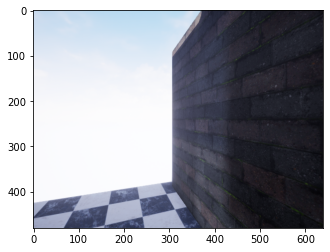

In [9]:
plt.imshow(img)